# Import Libraries

In [15]:
import pandas as pd
import numpy as np
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


# Read the data

In [16]:
#Read the dataset
df = pd.read_csv('bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


# Data analysis

In [17]:
df.shape

(850, 9)

The dataset contains 850 rows and 9 columns

In [18]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

Total coloumns in the data set are given 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


Five of the columns are of data type int and 4 of them are float. All are numerical

In [20]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


The mean age is 35, while min age is 20 and max is 56 and 50% of the age is 34. The education(ed) level is 1.71 on an avg with max 5. The tenure with currrent employer is on an avg 8.5 years with max 33 years. Number of years in same address on an avg is 8.37 years and max 34. Customer income can be seen as 46.6 on an average and min to be 13 and max 446. Average debt to income ratio is 6.7 and max value is 41. ie, less than 50% of income is the debt Credit to debt ratio is low with max value 20.56 which means the credit is lower than the debt.

In [21]:
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
90%,47.000000,3.000000,18.000000,19.000000,84.000000,19.200000,3.703304,7.111941,1.000000
95%,49.000000,4.000000,21.550000,22.550000,115.550000,23.510000,5.348674,9.481105,1.000000
99%,53.000000,4.000000,29.000000,26.510000,220.510000,31.565000,10.285997,16.931503,1.000000


The describe function with percentile for boxplot which is there in the data visualization part

In [22]:
 df['default'].value_counts(ascending=False)

0.0    517
1.0    183
Name: default, dtype: int64

Most of the customer has the education level 1 and very few has level 5 education

In [23]:
df['default'].isnull().sum()

150

There are 150 missing values in the target variable.
We need to either impute the missing values using KNN/other methods or we need to drop those.
If we impute the target variable, the dataset can be biased or impure. So, we are dropping the null values.

# Filling null values

In [24]:
df['default'].fillna(df['default'].median(), inplace=True)
df['default'].isna().sum()

0

In [25]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

There are no missing values now

# Finding X and y cols

In [26]:
X = df[df.columns[:-1:]]
y = df['default']

# MinMaxScaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
scaler.fit(X)

MinMaxScaler()

In [29]:
X_scaled = scaler.transform(X)

# Traintestsplit

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=17)

## Feature reduction on corr

In [31]:
df.corr()['default']

age        -0.131556
ed          0.107925
employ     -0.258410
address    -0.150376
income     -0.074274
debtinc     0.355378
creddebt    0.208834
othdebt     0.120898
default     1.000000
Name: default, dtype: float64

In [32]:
final_col=list(df.corr()['default'][(df.corr()['default']>=0.07)|(df.corr()['default']<=-0.07)].index)
final_col

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

# Model building
# 1 logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
model.score(X_test,y_test)

0.7823529411764706

In [36]:
# knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7588235294117647

In [37]:
## SVM 
from sklearn.svm import SVC
model = SVC(kernel='poly')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8058823529411765

In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7294117647058823

In [39]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8117647058823529

The accuracy using Random Forest  is 82.35%

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [41]:
dict1 = {'min_samples_leaf' : [2,3,4,5],
         'max_depth' : [2,3,4,5]} 

In [42]:
grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=dict1, cv=5, verbose=2)
grid_cv.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5]},
             verbose=2)

In [43]:
grid_cv.best_score_

0.7929411764705881

# GBoost

In [44]:
#Train and Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.820


In [46]:
gb.feature_importances_

array([0.10011998, 0.02340779, 0.16873145, 0.07561281, 0.03920872,
       0.27221621, 0.19994629, 0.12075675])

In [47]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

Accuracy on training set: 0.820
Accuracy on test set: 0.820


In [48]:
gb1.feature_importances_

array([0.01971471, 0.00317597, 0.31280417, 0.08454925, 0.00485079,
       0.39483142, 0.16947104, 0.01060266])

In [49]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.808


We get the best accuracy of 80.80% in test data

# AdaBoost 

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc =  AdaBoostClassifier(random_state=0,learning_rate= 0.05)
abc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(abc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(abc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.808


In [52]:
abc.feature_importances_

array([0.  , 0.  , 0.42, 0.06, 0.  , 0.46, 0.06, 0.  ])

# Data visualization

In [53]:
#Heat map

df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.131556
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.107925
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.258410
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.150376
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.074274
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.355378
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.208834
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.120898
default,-0.131556,0.107925,-0.258410,-0.150376,-0.074274,0.355378,0.208834,0.120898,1.000000


In [54]:
data= df.corr()

<Figure size 1000x700 with 0 Axes>

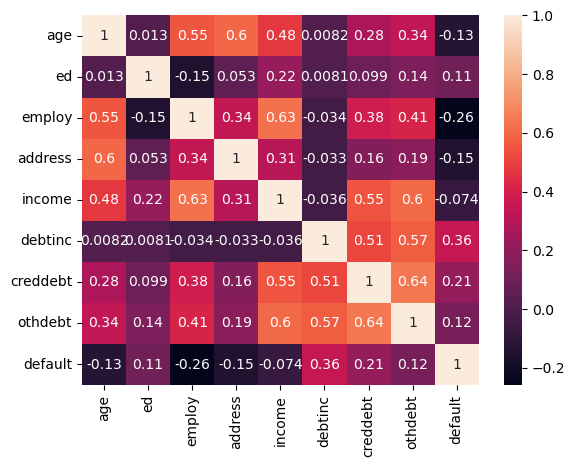

<Figure size 1000x700 with 0 Axes>

In [55]:
sns.heatmap(data, annot= True)
plt.figure(figsize=(10,7))

<Axes: ylabel='othdebt'>

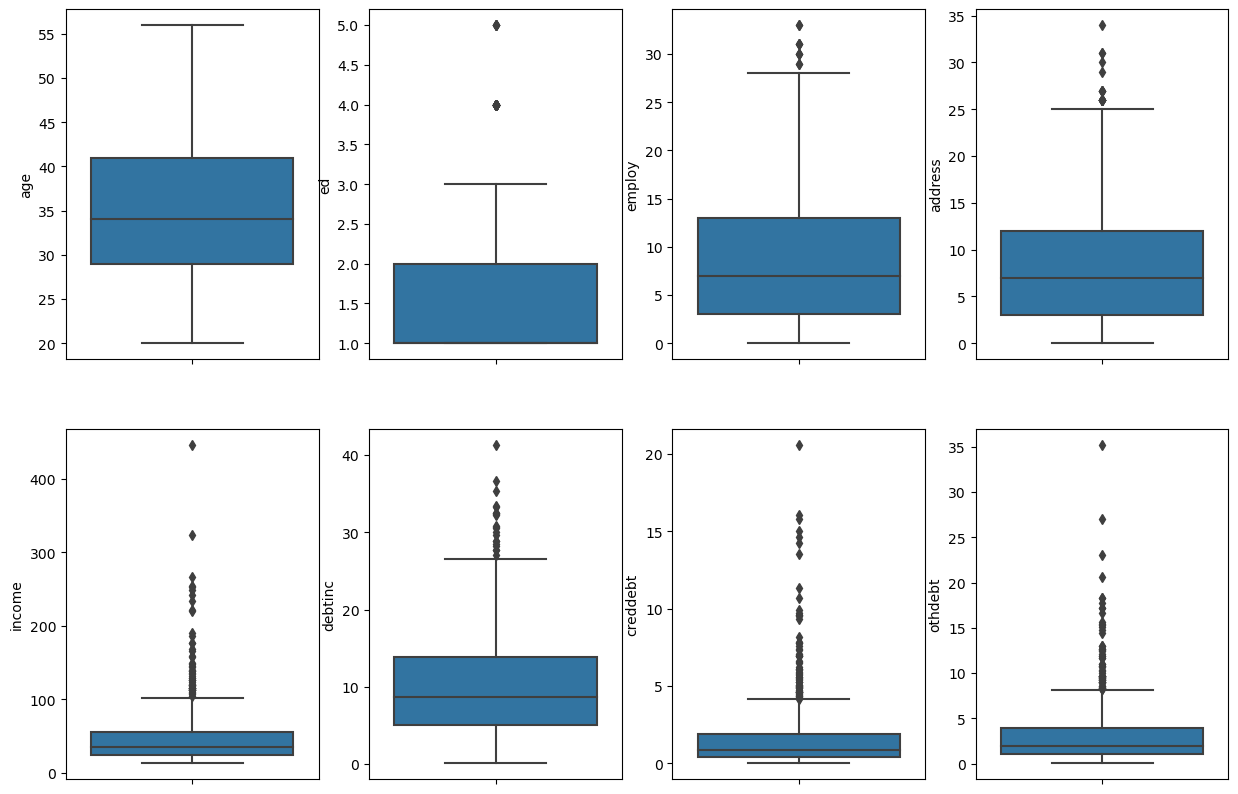

In [62]:
#Boxplot
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=df)
plt.subplot(2,4,2)
sns.boxplot(y='ed',data=df)
plt.subplot(2,4,3)
sns.boxplot(y='employ',data=df)
plt.subplot(2,4,4)
sns.boxplot(y='address',data=df)
plt.subplot(2,4,5)
sns.boxplot(y='income',data=df)
plt.subplot(2,4,6)
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])
sns.boxplot(y='debtinc',data=df)
plt.subplot(2,4,7)
sns.boxplot(y='creddebt',data=df)
plt.subplot(2,4,8)
sns.boxplot(y='othdebt',data=df)

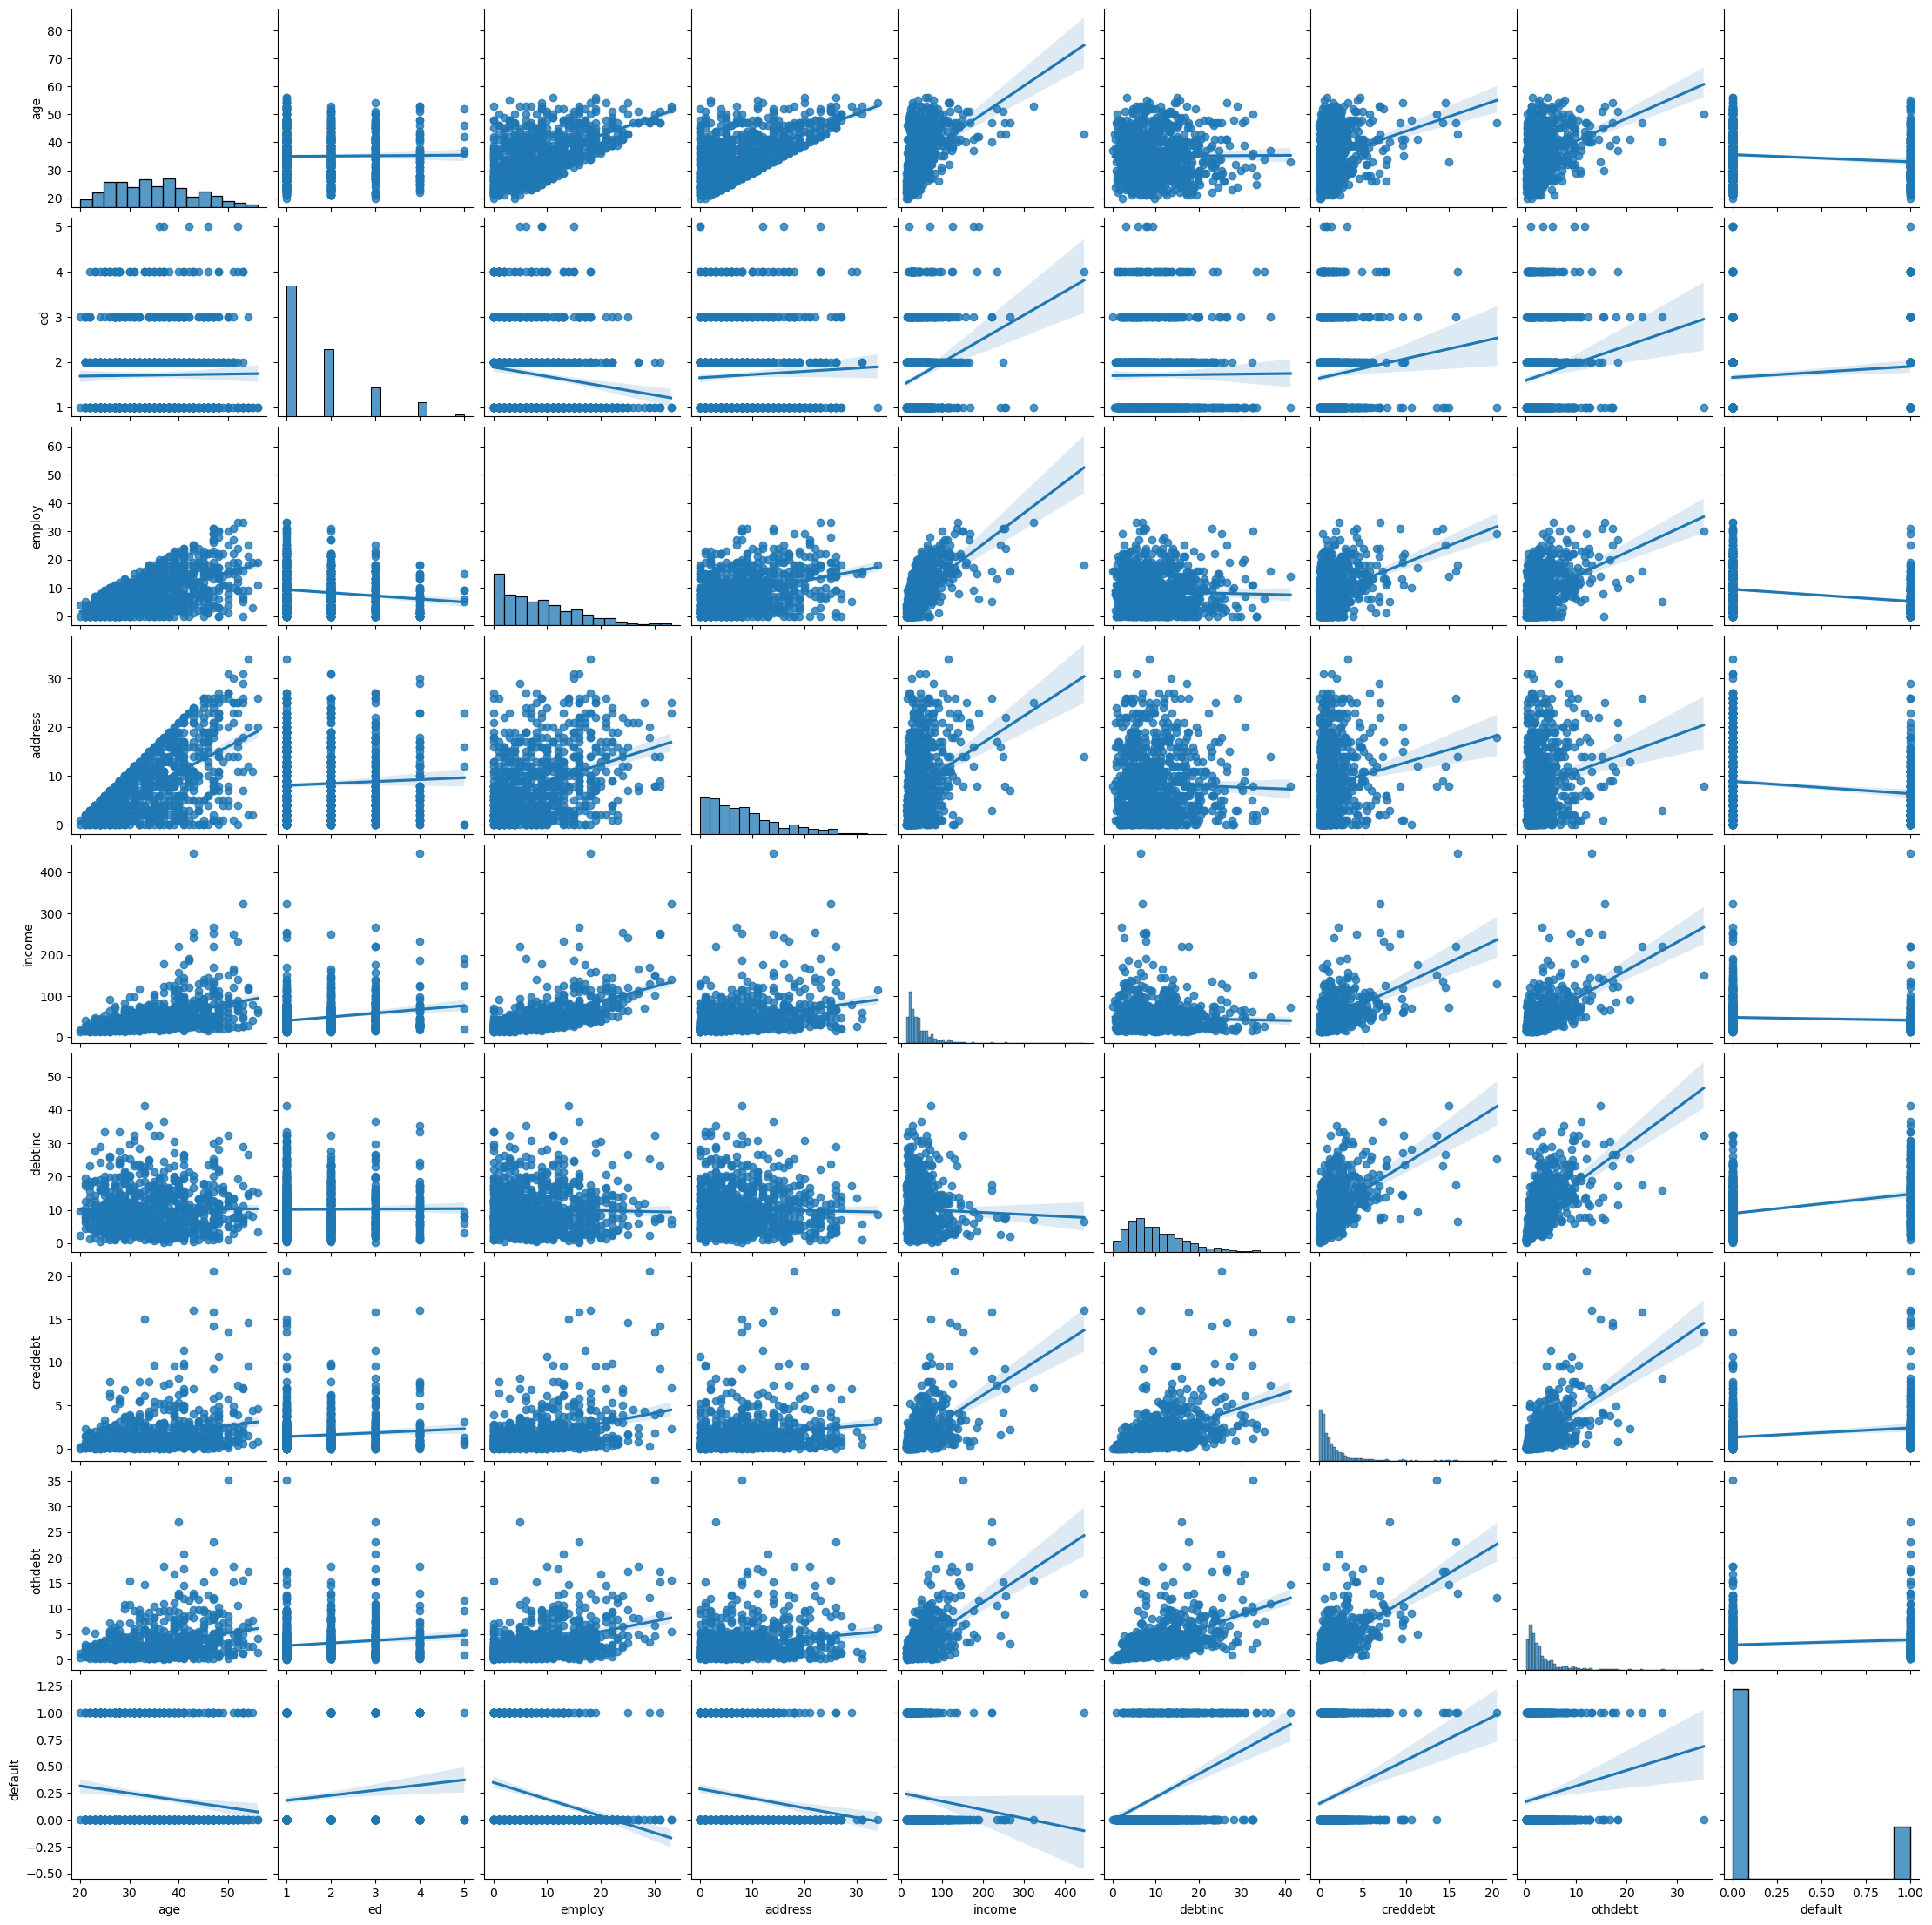

In [56]:
sns.pairplot(df, kind='reg')

In [57]:
#Find the correlation 
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.131556
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.107925
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.258410
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.150376
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.074274
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.355378
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.208834
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.120898
default,-0.131556,0.107925,-0.258410,-0.150376,-0.074274,0.355378,0.208834,0.120898,1.000000


In [58]:
#Find the correlation for the dataset with target variable
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.131556
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.107925
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.258410
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.150376
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.074274
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.355378
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.208834
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.120898
default,-0.131556,0.107925,-0.258410,-0.150376,-0.074274,0.355378,0.208834,0.120898,1.000000


Age, employment tenure, address tenure and income has negative correlation with target variable.
The strongest positive correlation with target variable is debt to income ratio.

In [59]:
df['default'].value_counts()  #there are 150 missing values

0.0    667
1.0    183
Name: default, dtype: int64

0 means Never defaulted and 1 means Defaulted. We have more customers(517) not defaulted and 183 customers as defaulted

# Decision Tree classifier

In [64]:
dt = DecisionTreeClassifier(max_depth=3,random_state=43)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

In [61]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


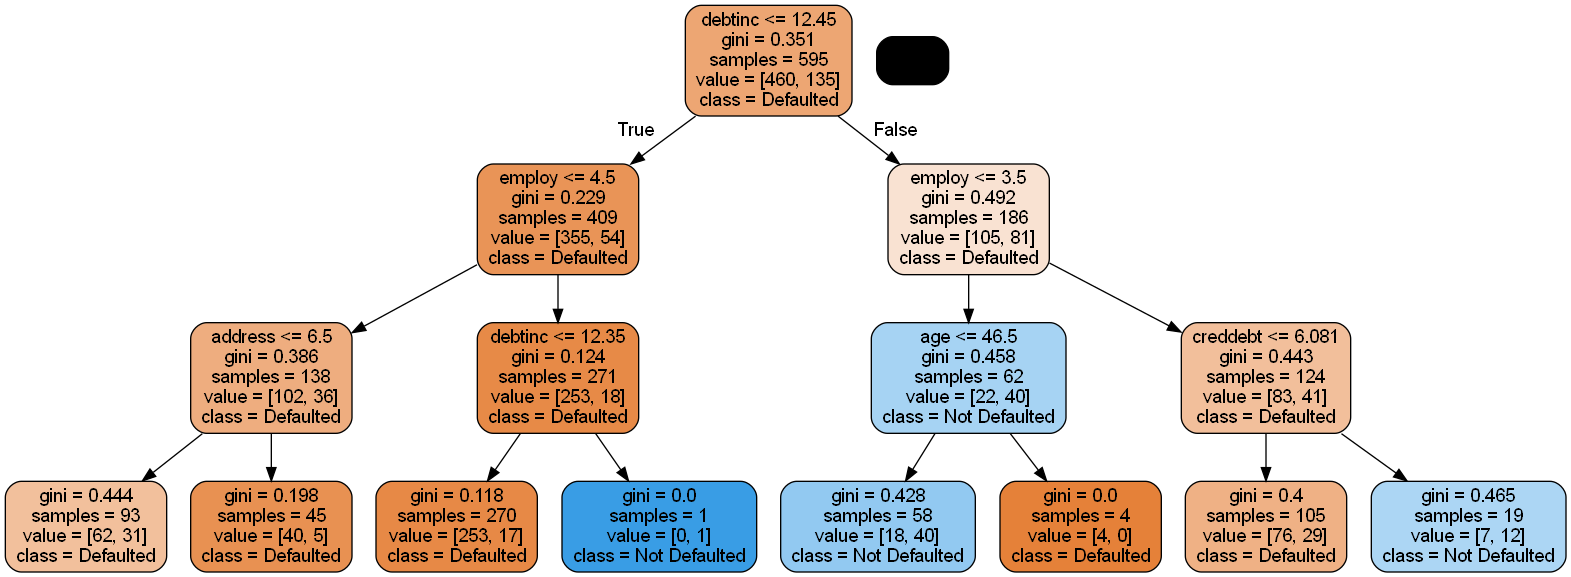

In [65]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt , out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Defaulted', "Not Defaulted"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [66]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [67]:
# Let's check the overall accuracy.
trainaccuracy= accuracy_score(y_train, y_train_pred)
testaccuracy= accuracy_score(y_test, y_test_pred)

confusion_TRN = confusion_matrix(y_train, y_train_pred)
confusion_TST = confusion_matrix(y_test, y_test_pred)

In [68]:
TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

In [69]:
# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy    : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy    : {} %".format(round((testaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy    : 82.02 %
Sensitivity : 39.26 %
Specificity : 94.57 %
------------------------------
On Test Data
------------------------------
Accuracy    : 82.35 %
Sensitivity : 27.08 %
Specificity : 95.17 %
------------------------------


Although our model has stable results on Train and Test data, this model has low Sensitivity and high Specificity and it would likely perform poorly to accurately predict the true positive class i.e The customer who has defaulted.

We get best accuracy of 82.9% while using GradientBoost. All other models give <=80%.
